**Build ML models based on ensemble learning techniques like, voting classification , bagging, random forest classification**

In [440]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [441]:
#reading dataset
df=pd.read_csv("/content/loan_dataset (2).csv")
df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [442]:
df.tail()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
116053,382119962287,Y,Browning-Hart,4.125,153000,360,2012-02-01,04/2012,88,2.0,...,0,0,0,0,0,0,0,0,0,0
116054,582803915466,Z,OTHER,3.000,150000,120,2012-01-01,03/2012,35,1.0,...,0,0,0,0,0,0,0,0,0,0
116055,837922316947,X,OTHER,3.875,166000,360,2012-02-01,04/2012,58,2.0,...,0,0,0,0,0,0,0,0,0,0
116056,477343182138,X,OTHER,4.250,169000,360,2012-02-01,04/2012,74,2.0,...,0,0,0,0,0,0,0,0,0,0
116057,763308490661,Z,Thornton-Davis,3.375,252000,180,2012-01-01,03/2012,29,2.0,...,0,0,0,0,0,0,0,0,0,0


In [443]:
df.shape

(116058, 29)

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116058 non-null  int64  
 1   source                    116058 non-null  object 
 2   financial_institution     116058 non-null  object 
 3   interest_rate             116058 non-null  float64
 4   unpaid_principal_bal      116058 non-null  int64  
 5   loan_term                 116058 non-null  int64  
 6   origination_date          116058 non-null  object 
 7   first_payment_date        116058 non-null  object 
 8   loan_to_value             116058 non-null  int64  
 9   number_of_borrowers       116058 non-null  float64
 10  debt_to_income_ratio      116058 non-null  float64
 11  borrower_credit_score     116058 non-null  float64
 12  loan_purpose              116058 non-null  object 
 13  insurance_percent         116058 non-null  f

In [445]:
df['loan_purpose']

0         C86
1         B12
2         B12
3         B12
4         C86
         ... 
116053    A23
116054    B12
116055    B12
116056    A23
116057    A23
Name: loan_purpose, Length: 116058, dtype: object

In [446]:
df['loan_purpose'].nunique()

3

In [447]:
#checking for missing value
df.isna().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

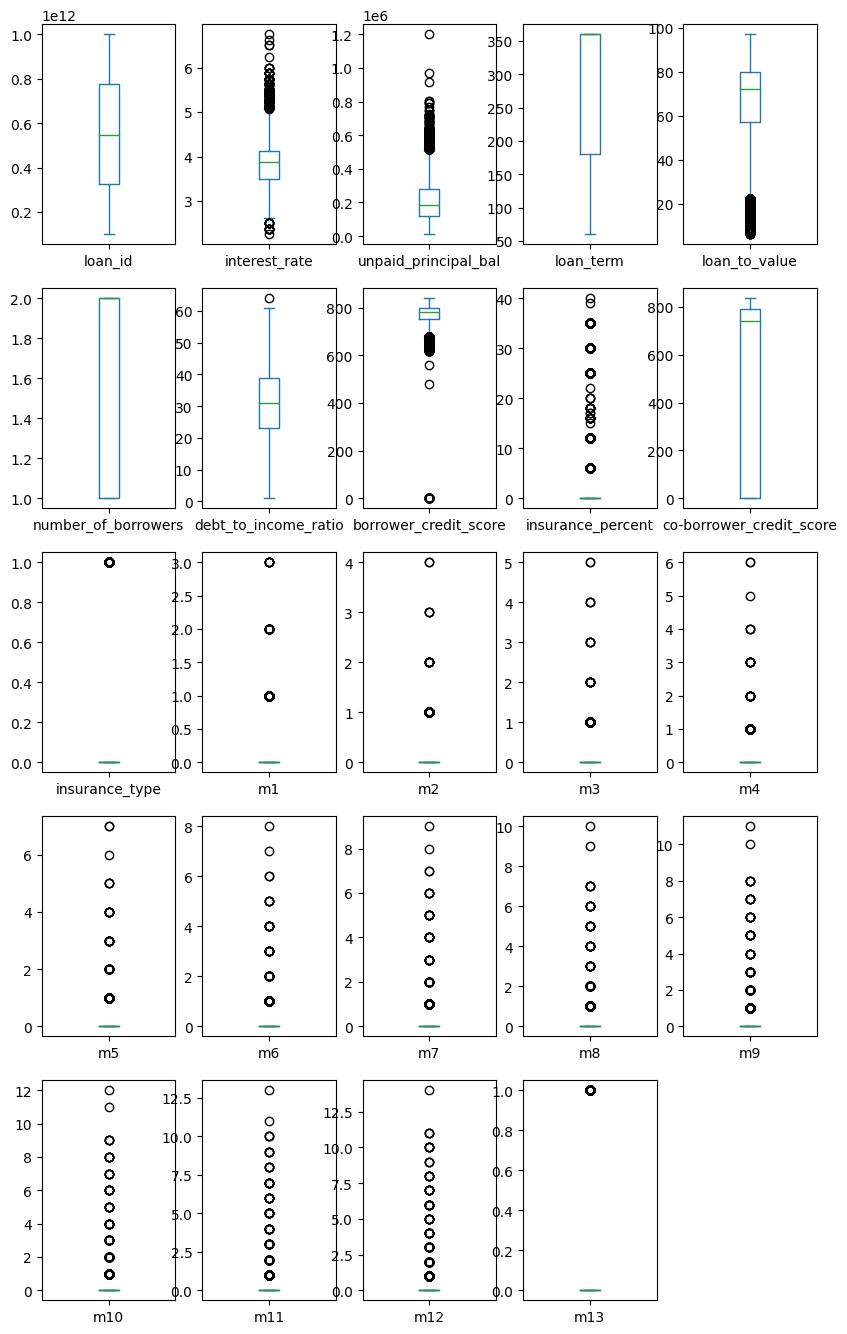

In [448]:
#checking for outliers
df.plot(kind="box",subplots=True,layout=(6,5),figsize=(10,20))
plt.show()

In [449]:
df.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [450]:
df.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

<ipython-input-451-c0250f16d424>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


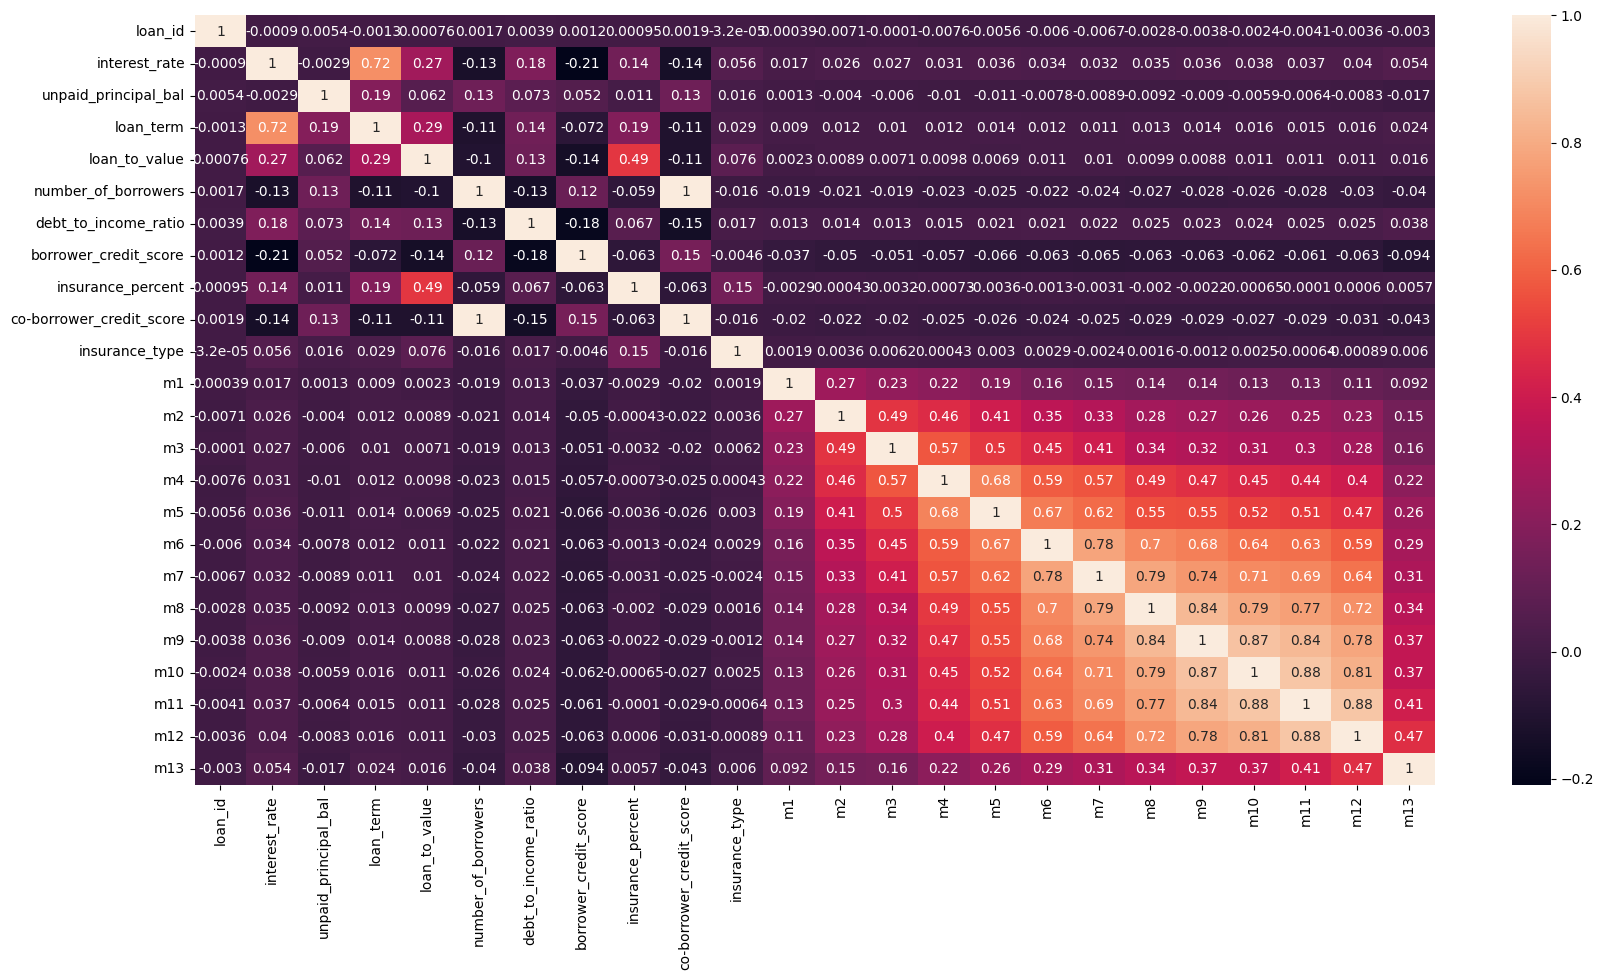

In [451]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

we will drop "borrower_credit_score",'m8','m10','m11' from considering the correlation coefficients

In [452]:
df.drop(["borrower_credit_score",'m8','m10','m11'],axis=1)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m1,m2,m3,m4,m5,m6,m7,m9,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,0,0,0,1,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,0,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,0,0,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,0,1,2,3,4,5,6,8,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,382119962287,Y,Browning-Hart,4.125,153000,360,2012-02-01,04/2012,88,2.0,...,0,0,0,0,0,0,0,0,0,0
116054,582803915466,Z,OTHER,3.000,150000,120,2012-01-01,03/2012,35,1.0,...,0,0,0,0,0,0,0,0,0,0
116055,837922316947,X,OTHER,3.875,166000,360,2012-02-01,04/2012,58,2.0,...,0,0,0,0,0,0,0,0,0,0
116056,477343182138,X,OTHER,4.250,169000,360,2012-02-01,04/2012,74,2.0,...,0,0,0,0,0,0,0,0,0,0


In [453]:
y=df.select_dtypes(include='object')

In [454]:
y.columns

Index(['source', 'financial_institution', 'origination_date',
       'first_payment_date', 'loan_purpose'],
      dtype='object')

We will label encode y and standardise all the features in both x and y

In [455]:
y.nunique()

source                    3
financial_institution    19
origination_date          3
first_payment_date        4
loan_purpose              3
dtype: int64

In [456]:
lst=list(y.columns)
lst

['source',
 'financial_institution',
 'origination_date',
 'first_payment_date',
 'loan_purpose']

In [457]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [458]:
for i in lst:
  df[i]= le.fit_transform(df[i])

In [459]:
df

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,2,18,4.250,214000,360,2,3,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,1,15,4.875,144000,360,0,1,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,2,17,3.250,366000,180,0,1,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,0,8,4.750,135000,360,1,2,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,0,8,4.750,124000,360,1,2,80,1.0,...,3,4,5,6,7,8,9,10,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,382119962287,1,1,4.125,153000,360,1,2,88,2.0,...,0,0,0,0,0,0,0,0,0,0
116054,582803915466,2,8,3.000,150000,120,0,1,35,1.0,...,0,0,0,0,0,0,0,0,0,0
116055,837922316947,0,8,3.875,166000,360,1,2,58,2.0,...,0,0,0,0,0,0,0,0,0,0
116056,477343182138,0,8,4.250,169000,360,1,2,74,2.0,...,0,0,0,0,0,0,0,0,0,0


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116058 non-null  int64  
 1   source                    116058 non-null  int64  
 2   financial_institution     116058 non-null  int64  
 3   interest_rate             116058 non-null  float64
 4   unpaid_principal_bal      116058 non-null  int64  
 5   loan_term                 116058 non-null  int64  
 6   origination_date          116058 non-null  int64  
 7   first_payment_date        116058 non-null  int64  
 8   loan_to_value             116058 non-null  int64  
 9   number_of_borrowers       116058 non-null  float64
 10  debt_to_income_ratio      116058 non-null  float64
 11  borrower_credit_score     116058 non-null  float64
 12  loan_purpose              116058 non-null  int64  
 13  insurance_percent         116058 non-null  f

In [461]:
X=df.drop('m13',axis=1)
y=df['m13']

In [462]:
x.columns

RangeIndex(start=0, stop=24, step=1)

In [463]:
from sklearn.preprocessing import StandardScaler


In [464]:
standardisation = StandardScaler()
X = standardisation.fit_transform(X)

In [465]:
X= pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,...,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05
mean,-7.346769e-18,-5.803947e-17,2.981564e-17,-6.856984e-17,-1.237854e-16,6.759027e-17,5.647828e-17,6.954941e-17,-2.207092e-17,1.616289e-17,...,-1.769347e-17,1.353030e-17,2.699938e-17,4.469284e-18,1.475476e-17,-2.387700e-18,1.876487e-17,-2.546880e-17,-7.836553e-18,2.005056e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.730149e+00,-8.173131e-01,-1.464252e+00,-3.511708e+00,-1.719727e+00,-2.587742e+00,-1.035598e+00,-2.483371e+00,-3.552695e+00,-1.207529e+00,...,-3.559909e-02,-3.506927e-02,-4.274965e-02,-3.907017e-02,-4.122105e-02,-4.265242e-02,-4.179149e-02,-4.458259e-02,-4.364174e-02,-4.527618e-02
25%,-8.660085e-01,-8.173131e-01,-1.239577e+00,-8.003173e-01,-7.692944e-01,-1.250874e+00,-1.035598e+00,-1.030689e+00,-6.032936e-01,-1.207529e+00,...,-3.559909e-02,-3.506927e-02,-4.274965e-02,-3.907017e-02,-4.122105e-02,-4.265242e-02,-4.179149e-02,-4.458259e-02,-4.364174e-02,-4.527618e-02
50%,-3.047577e-03,-8.173131e-01,3.331462e-01,1.309988e-02,-2.199617e-01,7.544282e-01,4.373840e-01,4.219936e-01,2.641773e-01,8.281373e-01,...,-3.559909e-02,-3.506927e-02,-4.274965e-02,-3.907017e-02,-4.122105e-02,-4.265242e-02,-4.179149e-02,-4.458259e-02,-4.364174e-02,-4.527618e-02
75%,8.657696e-01,6.017056e-01,3.331462e-01,5.553780e-01,6.083971e-01,7.544282e-01,4.373840e-01,4.219936e-01,7.268285e-01,8.281373e-01,...,-3.559909e-02,-3.506927e-02,-4.274965e-02,-3.907017e-02,-4.122105e-02,-4.265242e-02,-4.179149e-02,-4.458259e-02,-4.364174e-02,-4.527618e-02
max,1.734641e+00,2.020724e+00,2.579894e+00,6.249298e+00,8.647837e+00,7.544282e-01,1.910366e+00,1.874676e+00,1.709962e+00,8.281373e-01,...,9.017311e+01,9.648831e+01,8.466474e+01,9.133435e+01,8.910225e+01,8.835297e+01,8.573409e+01,8.080176e+01,7.976805e+01,7.855011e+01


In [466]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [467]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score

In [468]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

In [469]:
lg=LogisticRegression()
model=lg.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23084
           1       0.93      0.31      0.47       128

    accuracy                           1.00     23212
   macro avg       0.96      0.66      0.73     23212
weighted avg       1.00      1.00      1.00     23212



In [470]:
#knn
from sklearn.neighbors import KNeighborsClassifier

In [471]:
# Identifty the best values for n_neighbors
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    kncdf = KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    model = kncdf.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc_values.append(accuracy_score(y_test, predictions))

acc_values

[0.9953903153541271,
 0.9955195588488712,
 0.9953903153541271,
 0.9958642081681889,
 0.9958211270032742,
 0.9958642081681889,
 0.9958211270032742,
 0.9958642081681889,
 0.9958211270032742,
 0.9958642081681889,
 0.9958642081681889,
 0.9958211270032742]

Text(0, 0.5, 'Accuracy')

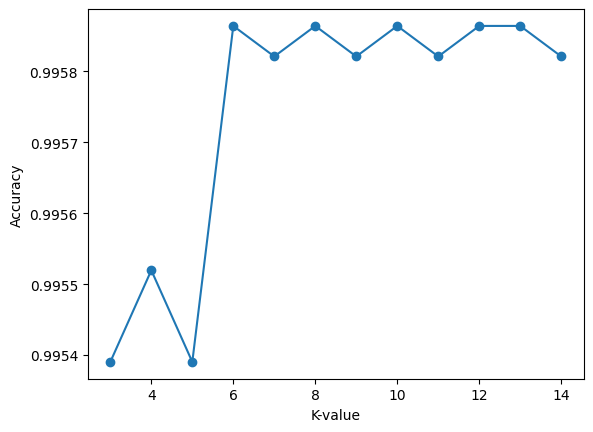

In [472]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel("K-value")
plt.ylabel("Accuracy")

In [473]:
kncdf = KNeighborsClassifier(leaf_size=1,n_neighbors=5,metric="minkowski",p=1)
model = kncdf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23084
           1       0.79      0.32      0.46       128

    accuracy                           1.00     23212
   macro avg       0.89      0.66      0.73     23212
weighted avg       1.00      1.00      0.99     23212



In [474]:

#decision tree
from sklearn.tree import DecisionTreeClassifier

In [475]:
dt=DecisionTreeClassifier(max_depth=8)
model=dt.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [476]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23084
           1       0.00      0.00      0.00       128

    accuracy                           0.99     23212
   macro avg       0.50      0.50      0.50     23212
weighted avg       0.99      0.99      0.99     23212



In [477]:
#voting classifier
from sklearn.ensemble import VotingClassifier

In [478]:
SEED=1

In [479]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=SEED,stratify=y)

In [480]:
lr=LogisticRegression(random_state=SEED)
dt=DecisionTreeClassifier(random_state=SEED)
knn=KNeighborsClassifier()

In [481]:
classifiers=[('Logistic Regression',lr),('K Nearest Neighbors',knn),('Classification Tree',dt)]

In [482]:
for clf_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print('{:s}:{:.3f}'.format(clf_name,f1_score(y_test,y_pred)))

    print('{:s}:{:.3f}'.format(clf_name,recall_score(y_test,y_pred)))

Logistic Regression:1.000
Logistic Regression:1.000
K Nearest Neighbors:0.988
K Nearest Neighbors:0.984
Classification Tree:1.000
Classification Tree:1.000


In [483]:
acc=accuracy_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("Accuracy",acc,"\nRecall score",recall,"\nF1_Score",f1score)

Accuracy 1.0 
Recall score 1.0 
F1_Score 1.0


In [484]:
#bagging classifier
from sklearn.ensemble import BaggingClassifier
dt=DecisionTreeClassifier()
bg=BaggingClassifier(estimator=dt,n_estimators=50)
bg=BaggingClassifier()
bg.fit(x_train,y_train)
y_pred=bg.predict(x_test)

In [485]:
acc=accuracy_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("Accuracy",acc,"\nRecall score",recall,"\nF1_Score",f1score)

Accuracy 1.0 
Recall score 1.0 
F1_Score 1.0
